   #                      COVID-19 DATA ANALYSIS

# Gathering Data

In [44]:
# import python libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("fivethirtyeight")

In [45]:
# Grab Worldwide covid-19 data website
page = requests.get("https://www.worldometers.info/coronavirus/")

#Check out whether the website can be accessible for scraping
page.status_code

200

In [46]:
# Parse Worldwide data from html 
soup = BeautifulSoup(page.content, "lxml")
items = soup.find("tbody")


In [47]:

data = [item.text for item in items.find_all('td')]
data_chunksize = [data[i:i + 13] for i in range(0, len(data), 13)]
data_chunksize = data_chunksize[8:]
country = [i[0] for i in data_chunksize]
total_cases = [i[1] for i in data_chunksize]
new_cases = [i[2] for i in data_chunksize]

total_deaths = [i[3] for i in data_chunksize]
new_deaths = [i[4] for i in data_chunksize]
total_recovered = [i[5] for i in data_chunksize]

active_cases = [i[6] for i in data_chunksize]
critical = [i[7] for i in data_chunksize]
total_cases_per_1M = [i[8] for i in data_chunksize]

deaths_per_1M = [i[9] for i in data_chunksize]
total_tests = [i[10] for i in data_chunksize]
tests_per_1M = [i[11] for i in data_chunksize]
continent = [i[12] for i in data_chunksize]


In [48]:
worldwide = pd.DataFrame({"Country" : country,
                          "Continent" :continent,
                          "Total Cases" : total_cases,
                          "New Cases" : new_cases,
                          "Total Deaths" : total_deaths,
                          "New Deaths" : new_deaths,
                          "Total Recovered" : total_recovered,
                          "Active Cases" : active_cases, 
                          "Serious/Critical" : critical, 
                          "Total Cases/1M pop" : total_cases_per_1M,
                          "Deaths/1M pop" : deaths_per_1M,
                          "Total Tests" : total_tests, 
                          "Tests/1M pop" : tests_per_1M})

In [49]:
# Grab USA covid-19 data website
page_1 = requests.get("https://www.worldometers.info/coronavirus/country/us/")

# Parse USA data from HTML file
soup_1 = BeautifulSoup(page_1.content, "lxml")
items_1 = soup_1.find("tbody")

data_1 = [item_1.text.replace('\n', "").strip() for item_1 in items_1.find_all('td')]
data_chunksize_1 = [data_1[i:i + 12] for i in range(0, len(data_1), 12)]

usa_state = [i[0] for i in data_chunksize_1]
total_cases_1 = [i[1] for i in data_chunksize_1]
new_cases_1 = [i[2] for i in data_chunksize_1]

total_deaths_1 = [i[3] for i in data_chunksize_1]
new_deaths_1 = [i[4] for i in data_chunksize_1]
active_cases_1 = [i[5] for i in data_chunksize_1]

total_cases_per_1M_1 = [i[6] for i in data_chunksize_1]
deaths_per_1M_1 = [i[7] for i in data_chunksize_1]

total_tests_1 = [i[8] for i in data_chunksize_1]
tests_per_1M_1 = [i[9] for i in data_chunksize_1]



In [50]:
usa = pd.DataFrame({"USA State" : usa_state,
                  "Total Cases" : total_cases_1,
                  "New Cases" : new_cases_1,
                  "Total Deaths" : total_deaths_1,
                  "New Deaths" : new_deaths_1,
                  "Active Cases" : active_cases_1,  
                  "Total Cases/1M pop" : total_cases_per_1M_1,
                  "Deaths/1M pop" : deaths_per_1M_1,
                  "Total Tests" : total_tests_1, 
                  "Tests/1M pop" : tests_per_1M_1})

## Assessing Data

In [51]:
# Display the first 5 rows of the worldwide data
worldwide.head(10)

,Country,Continent,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious/Critical,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
0,USA,North America,"1,448,460","+18,112","86,454","+1,257","312,535","1,049,471","16,252","4,376",261,"10,516,577","31,772"
1,Spain,Europe,"272,646","+1,551","27,321",+217,"186,480","58,845","1,376","5,831",584,"2,467,761","52,781"
2,Russia,Europe,"252,245","+9,974","2,305",+93,"53,530","196,410","2,300","1,728",16,"6,188,102","42,403"
3,UK,Europe,"233,151","+3,446","33,614",+428,N/A,"199,193","1,559","3,434",495,"2,219,281","32,691"
4,Italy,Europe,"223,096",+992,"31,368",+262,"115,288","76,440",855,"3,690",519,"2,807,504","46,434"
5,Brazil,South America,"197,838","+8,681","13,618",+460,"78,424","105,796","8,318",931,64,"735,224","3,459"
6,France,Europe,"178,870",+810,"27,425",+351,"59,605","91,840","2,299","2,740",420,"1,384,633","21,213"
7,Germany,Europe,"174,636",+538,"7,900",+39,"150,300","16,436","1,329","2,084",94,"3,147,771","37,570"
8,Turkey,Asia,"144,749","+1,635","4,007",+55,"104,030","36,712",963,"1,716",48,"1,508,824","17,890"
9,Iran,Asia,"114,533","+1,808","6,854",+71,"90,539","17,140","2,758","1,364",82,"643,772","7,665"


In [52]:

worldwide.tail()

,Country,Continent,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious/Critical,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
210,Western Sahara,Africa,6,,,,6,0,,10,,,
211,Anguilla,North America,3,,,,3,0,,200,,,
212,Lesotho,Africa,1,,,,,1,,0.5,,,
213,Saint Pierre Miquelon,North America,1,,,,1,0,,173,,,
214,China,Asia,"82,929",+3,"4,633",,"78,195",101,9,58,3,,


In [53]:
# Display the first 5 rows of the USA data
usa.head()

,USA State,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
0,USA Total,"1,448,460","+18,112","86,454","+1,257","1,038,380","4,376",261,"10,516,577","31,772"
1,New York,"352,964","+2,116","27,403",+113,"265,803","18,144","1,409","1,298,757","66,762"
2,New Jersey,"143,484",+623,"9,946",+219,"127,071","16,154","1,120","451,696","50,854"
3,Illinois,"87,937","+3,239","3,928",+136,"74,433","6,940",310,"512,037","40,408"
4,Massachusetts,"80,497",,"5,315",,"47,370","11,679",771,"410,032","59,490"


In [54]:
# Number of countries and USA states affected by covid-19 respectively
print("The number worldwide countries in this dataset is {}".format(worldwide.shape[0]))
print("The number of USA States and territories in this dataset is {}".format(usa.shape[0]))

The number worldwide countries in this dataset is 215
The number of USA States and territories in this dataset is 52


In [55]:
# Show the brief summary of  worldwide data
worldwide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             215 non-null    object
 1   Continent           215 non-null    object
 2   Total Cases         215 non-null    object
 3   New Cases           215 non-null    object
 4   Total Deaths        215 non-null    object
 5   New Deaths          215 non-null    object
 6   Total Recovered     215 non-null    object
 7   Active Cases        215 non-null    object
 8   Serious/Critical    215 non-null    object
 9   Total Cases/1M pop  215 non-null    object
 10  Deaths/1M pop       215 non-null    object
 11  Total Tests         215 non-null    object
 12  Tests/1M pop        215 non-null    object
dtypes: object(13)
memory usage: 22.0+ KB


In [56]:
# Show the brief summary of  USA dataset
usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   USA State           52 non-null     object
 1   Total Cases         52 non-null     object
 2   New Cases           52 non-null     object
 3   Total Deaths        52 non-null     object
 4   New Deaths          52 non-null     object
 5   Active Cases        52 non-null     object
 6   Total Cases/1M pop  52 non-null     object
 7   Deaths/1M pop       52 non-null     object
 8   Total Tests         52 non-null     object
 9   Tests/1M pop        52 non-null     object
dtypes: object(10)
memory usage: 4.2+ KB


# Cleaning Worldwide Dataset

In [57]:
# Strip "+" from "New Cases" and "New Deaths" columns
worldwide["New Cases"] = worldwide["New Cases"].str.strip("+")
worldwide["New Deaths"] = worldwide["New Deaths"].str.strip("+")
worldwide.head(3)

,Country,Continent,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious/Critical,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
0,USA,North America,"1,448,460","18,112","86,454","1,257","312,535","1,049,471","16,252","4,376",261,"10,516,577","31,772"
1,Spain,Europe,"272,646","1,551","27,321",217,"186,480","58,845","1,376","5,831",584,"2,467,761","52,781"
2,Russia,Europe,"252,245","9,974","2,305",93,"53,530","196,410","2,300","1,728",16,"6,188,102","42,403"


In [58]:
# Remove "," from column values and strip off white spaces
for col in worldwide.columns:
  worldwide[col]= worldwide[col].str.replace(",", "").str.strip()


In [59]:
# Replace empty cells with zero(0)
for col in worldwide.columns:
    worldwide[col].replace("", 0, inplace=True)

In [60]:
worldwide["Total Recovered"].unique()

array(['312535', '186480', '53530', 'N/A', '115288', '78424', '59605',
       '150300', '104030', '90539', '27969', '24324', '35922', '14111',
       '19051', '26990', '15655', '9695', '3433', '27100', '4971', '3198',
       '3356', '8168', '4809', '19470', '6930', '3361', '6696', '4143',
       '12521', '9053', '14405', '8920', '3518', '3133', '5676', '3451',
       '2337', '3351', '9762', '2626', '8805', '4084', '6067', '5227',
       '32', '6301', '2385', '5351', '3310', '3158', '4300', '2220',
       '691', '2531', '2228', '514', '1070', '1303', '3665', '1572',
       '1169', '339', '2028', '2850', '1553', '1833', '1374', '2136',
       '856', '237', '1850', '1272', '842', '531', '902', '1383', '198',
       '1780', '909', '1235', '934', '1411', '1112', '267', '121', '905',
       '157', '130', '627', '405', '735', '1009', '759', '152', '40',
       '445', 0, '481', '694', '236', '658', '26', '535', '436', '592',
       '596', '284', '184', '545', '651', '383', '124', '172', '393',

In [61]:
# Replace "N/A" with zero(0)
for col in worldwide.columns:
    worldwide[col].replace("N/A", 0, inplace=True)

In [62]:
worldwide.isnull().sum()

Country               0
Continent             0
Total Cases           0
New Cases             0
Total Deaths          0
New Deaths            0
Total Recovered       0
Active Cases          0
Serious/Critical      0
Total Cases/1M pop    0
Deaths/1M pop         0
Total Tests           0
Tests/1M pop          0
dtype: int64

In [63]:
# Change all datatpyes of worldwide dataset to int except "Country" column
worldwide = worldwide.astype({'New Cases' : int,
                              'Total Cases' : int, 
                              'Total Deaths' : int,
                              'New Deaths' : int,
                              'Total Recovered' : int,
                              'Active Cases' : int, 
                              'Serious/Critical' : int, 
                              'Total Cases/1M pop' : float,
                              'Deaths/1M pop' : float,
                              'Total Tests' : int, 
                              'Tests/1M pop' : float})


In [64]:
worldwide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             215 non-null    object 
 1   Continent           215 non-null    object 
 2   Total Cases         215 non-null    int32  
 3   New Cases           215 non-null    int32  
 4   Total Deaths        215 non-null    int32  
 5   New Deaths          215 non-null    int32  
 6   Total Recovered     215 non-null    int32  
 7   Active Cases        215 non-null    int32  
 8   Serious/Critical    215 non-null    int32  
 9   Total Cases/1M pop  215 non-null    float64
 10  Deaths/1M pop       215 non-null    float64
 11  Total Tests         215 non-null    int32  
 12  Tests/1M pop        215 non-null    float64
dtypes: float64(3), int32(8), object(2)
memory usage: 15.2+ KB


In [65]:
# Drop continent column with 0 values
worldwide =worldwide[worldwide['Continent']!= 0]


In [66]:
# Sort values by "Total Cases" column
worldwide.sort_values("Total Cases", ascending= False, inplace= True)

# reset index 
worldwide.reset_index(drop= True, inplace=True)

# Display the first 10 rows of dataset
worldwide.head(10)

,Country,Continent,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious/Critical,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
0,USA,North America,1448460,18112,86454,1257,312535,1049471,16252,4376.0,261.0,10516577,31772.0
1,Spain,Europe,272646,1551,27321,217,186480,58845,1376,5831.0,584.0,2467761,52781.0
2,Russia,Europe,252245,9974,2305,93,53530,196410,2300,1728.0,16.0,6188102,42403.0
3,UK,Europe,233151,3446,33614,428,0,199193,1559,3434.0,495.0,2219281,32691.0
4,Italy,Europe,223096,992,31368,262,115288,76440,855,3690.0,519.0,2807504,46434.0
5,Brazil,South America,197838,8681,13618,460,78424,105796,8318,931.0,64.0,735224,3459.0
6,France,Europe,178870,810,27425,351,59605,91840,2299,2740.0,420.0,1384633,21213.0
7,Germany,Europe,174636,538,7900,39,150300,16436,1329,2084.0,94.0,3147771,37570.0
8,Turkey,Asia,144749,1635,4007,55,104030,36712,963,1716.0,48.0,1508824,17890.0
9,Iran,Asia,114533,1808,6854,71,90539,17140,2758,1364.0,82.0,643772,7665.0


In [67]:
# Export data as csv file
worldwide.to_csv("worldwide_covid19.csv", index=False)

In [68]:
# Rename column headers and convert to lowercase
worldwide.columns = worldwide.columns.str.replace("/", " ")
worldwide.columns = worldwide.columns.str.replace(" ", "_").str.lower()

In [69]:
worldwide.set_index("country", inplace=True)

In [70]:
worldwide.head(3)

,continent,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,serious_critical,total_cases_1m_pop,deaths_1m_pop,total_tests,tests_1m_pop
country,,,,,,,,,,,,
USA,North America,1448460,18112,86454,1257,312535,1049471,16252,4376.0,261.0,10516577,31772.0
Spain,Europe,272646,1551,27321,217,186480,58845,1376,5831.0,584.0,2467761,52781.0
Russia,Europe,252245,9974,2305,93,53530,196410,2300,1728.0,16.0,6188102,42403.0


# Cleaning USA Dataset

In [71]:
# Remove "USA Total" record from dataset
usa = usa[usa["USA State"] != "USA Total"]
usa.head(10)

,USA State,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
1,New York,"352,964","+2,116","27,403",+113,"265,803","18,144","1,409","1,298,757","66,762"
2,New Jersey,"143,484",+623,"9,946",+219,"127,071","16,154","1,120","451,696","50,854"
3,Illinois,"87,937","+3,239","3,928",+136,"74,433","6,940",310,"512,037","40,408"
4,Massachusetts,"80,497",,"5,315",,"47,370","11,679",771,"410,032","59,490"
5,California,"73,172",+267,"3,032",+66,"57,949","1,852",77,"1,104,651","27,957"
6,Pennsylvania,"62,808",+595,"4,312",+165,"51,881","4,906",337,"319,562","24,962"
7,Michigan,"49,582","+1,191","4,787",+73,"22,109","4,965",479,"329,639","33,007"
8,Texas,"43,586",+84,"1,218",+1,"18,663","1,503",42,"587,431","20,259"
9,Florida,"43,210",+808,"1,876",+47,"33,955","2,012",87,"609,577","28,382"
10,Maryland,"35,903","+1,091","1,866",+57,"31,581","5,939",309,"178,454","29,518"


In [72]:
# Strip "+" from "New Cases" and "New Deaths" columns
usa["New Cases"] = usa["New Cases"].str.strip("+")
usa["New Deaths"] = usa["New Deaths"].str.strip("+")



In [73]:
# Remove "," from column values and strip off white spaces
for col in usa.columns:
  usa[col]= usa[col].str.replace(",", "").str.strip()
usa.head(3) 

,USA State,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
1,New York,352964,2116,27403,113,265803,18144,1409,1298757,66762
2,New Jersey,143484,623,9946,219,127071,16154,1120,451696,50854
3,Illinois,87937,3239,3928,136,74433,6940,310,512037,40408


In [74]:
# Replace empty cells with zero(0)
for col in usa.columns:
  usa[col].replace("", 0, inplace = True)

In [75]:
usa["Tests/1M pop"].unique()

array(['66762', '50854', '40408', '59490', '27957', '24962', '33007',
       '20259', '28382', '29518', '26926', '40093', '53259', '21739',
       '19830', '23802', '19536', '34285', '44268', '20906', '28302',
       '22830', '24105', '95908', '22993', '28732', '35390', '20227',
       '27619', '18619', '19752', '37850', '26277', '46757', '48905',
       '26944', '54850', '27763', '25124', '29214', '20551', '28811',
       '18538', '66020', '24576', '38341', '36066', '26019', '27096',
       '22969', '41896'], dtype=object)

In [76]:
# Change all datatpyes of worldwide dataset to int except "USA State" column
usa = usa.astype({"Total Cases" : int,
              "New Cases" : int,
              "Total Deaths" : int,
              "New Deaths" : int,
              "Active Cases" : int,  
              "Total Cases/1M pop" : float,
              "Deaths/1M pop" : float,
              "Total Tests" : int, 
              "Tests/1M pop" : float})

In [77]:
# Check out the conversion of dtypes
usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   USA State           51 non-null     object 
 1   Total Cases         51 non-null     int32  
 2   New Cases           51 non-null     int32  
 3   Total Deaths        51 non-null     int32  
 4   New Deaths          51 non-null     int32  
 5   Active Cases        51 non-null     int32  
 6   Total Cases/1M pop  51 non-null     float64
 7   Deaths/1M pop       51 non-null     float64
 8   Total Tests         51 non-null     int32  
 9   Tests/1M pop        51 non-null     float64
dtypes: float64(3), int32(6), object(1)
memory usage: 3.2+ KB


In [78]:
# Sort values by "Total Cases" column
usa.sort_values("Total Cases", ascending= False, inplace=True)

# Display the first 10 rows of dataset
usa.head(10)

,USA State,Total Cases,New Cases,Total Deaths,New Deaths,Active Cases,Total Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
1,New York,352964,2116,27403,113,265803,18144.0,1409.0,1298757,66762.0
2,New Jersey,143484,623,9946,219,127071,16154.0,1120.0,451696,50854.0
3,Illinois,87937,3239,3928,136,74433,6940.0,310.0,512037,40408.0
4,Massachusetts,80497,0,5315,0,47370,11679.0,771.0,410032,59490.0
5,California,73172,267,3032,66,57949,1852.0,77.0,1104651,27957.0
6,Pennsylvania,62808,595,4312,165,51881,4906.0,337.0,319562,24962.0
7,Michigan,49582,1191,4787,73,22109,4965.0,479.0,329639,33007.0
8,Texas,43586,84,1218,1,18663,1503.0,42.0,587431,20259.0
9,Florida,43210,808,1876,47,33955,2012.0,87.0,609577,28382.0
10,Maryland,35903,1091,1866,57,31581,5939.0,309.0,178454,29518.0


In [79]:
# Export data as csv file
usa.to_csv("united_states_covid19.csv", index= False)

In [80]:
# Rename column headers and convert to lowercase
usa.columns = usa.columns.str.replace("/", " ")
usa.columns = usa.columns.str.replace(" ", "_").str.lower()

In [81]:
usa.head(2)

,usa_state,total_cases,new_cases,total_deaths,new_deaths,active_cases,total_cases_1m_pop,deaths_1m_pop,total_tests,tests_1m_pop
1,New York,352964,2116,27403,113,265803,18144.0,1409.0,1298757,66762.0
2,New Jersey,143484,623,9946,219,127071,16154.0,1120.0,451696,50854.0


# Analysis

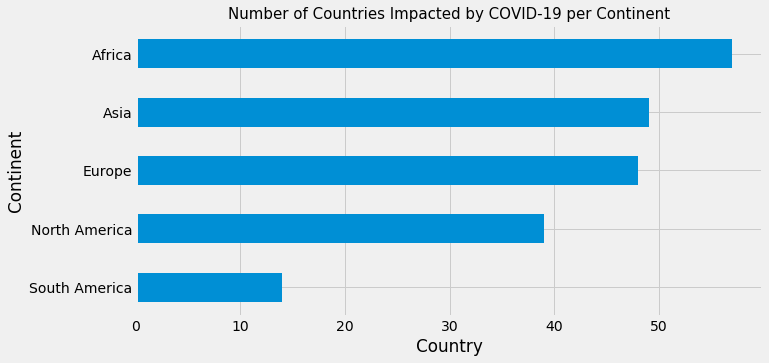

In [82]:
# Filter out the continent column
plt.figure(figsize= (10, 5))
worldwide['continent'].value_counts().sort_values()[1:].plot.barh()
plt.xlabel('Country')
plt.ylabel('Continent')
plt.title('Number of Countries Impacted by COVID-19 per Continent', fontsize = 15);

### Which continent has the highest total cases, total deaths and total recovered?

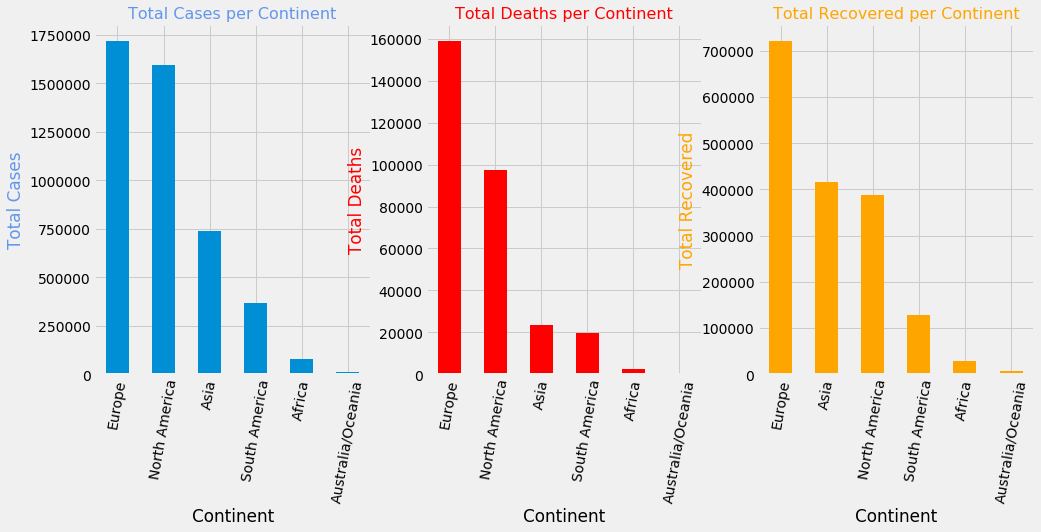

In [83]:

con =worldwide.groupby('continent').sum()
plt.figure(figsize= (15, 6))

# Total cases
plt.subplot(1,3, 1)
con.total_cases.sort_values(ascending = False).plot.bar()
plt.xticks(rotation = 80)
plt.ylabel('Total Cases', color = 'cornflowerblue')
plt.xlabel('Continent')
plt.title('Total Cases per Continent', fontsize= 16, color = 'cornflowerblue')

# Total deaths
plt.subplot(1,3, 2)
con.total_deaths.sort_values(ascending = False).plot.bar(color = 'r')
plt.xticks(rotation = 80)
plt.ylabel('Total Deaths', color = 'r')
plt.xlabel('Continent')
plt.title('Total Deaths per Continent', fontsize= 16, color = 'r')

# Total recovered
plt.subplot(1,3, 3)
con.total_recovered.sort_values(ascending = False).plot.bar(color = 'orange')
plt.xticks(rotation = 80)
plt.ylabel('Total Recovered', color = 'orange')
plt.xlabel('Continent')
plt.title('Total Recovered per Continent', fontsize= 16, color = 'orange' );

### What are the top 10 countries in the world with the highest total cases, total deaths and total recovered?

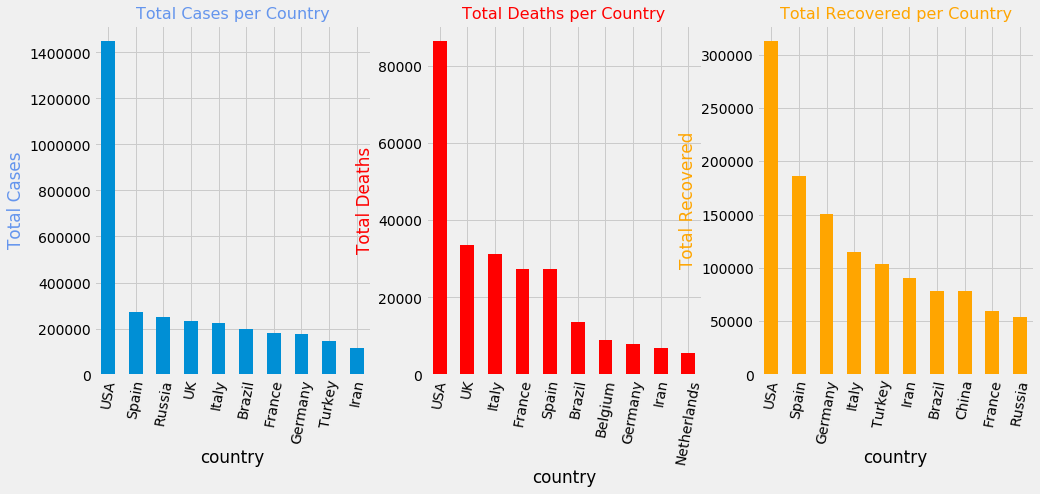

In [84]:
plt.figure(figsize= (15, 6))

# Total cases
plt.subplot(1,3, 1)
worldwide["total_cases"].head(10).plot.bar()
plt.xticks(rotation = 80)
plt.ylabel('Total Cases', color = 'cornflowerblue')
plt.title('Total Cases per Country', fontsize= 16, color = 'cornflowerblue')

# Total deaths
plt.subplot(1,3, 2)
worldwide.total_deaths.sort_values(ascending = False)[:10].plot.bar(color = 'r')
plt.xticks(rotation = 80)
plt.ylabel('Total Deaths', color = 'r')
plt.title('Total Deaths per Country', fontsize= 16, color = 'r')

# Total recovered
plt.subplot(1,3, 3)
worldwide.total_recovered.sort_values(ascending = False)[:10].plot.bar(color = 'orange')
plt.xticks(rotation = 80)
plt.ylabel('Total Recovered', color = 'orange')
plt.title('Total Recovered per Country', fontsize= 16, color = 'orange' );

### What are the top 10  USA States with the highest total cases and total deaths ?

In [85]:
# set 'usa_state' column as an index
usa.set_index('usa_state', inplace= True)

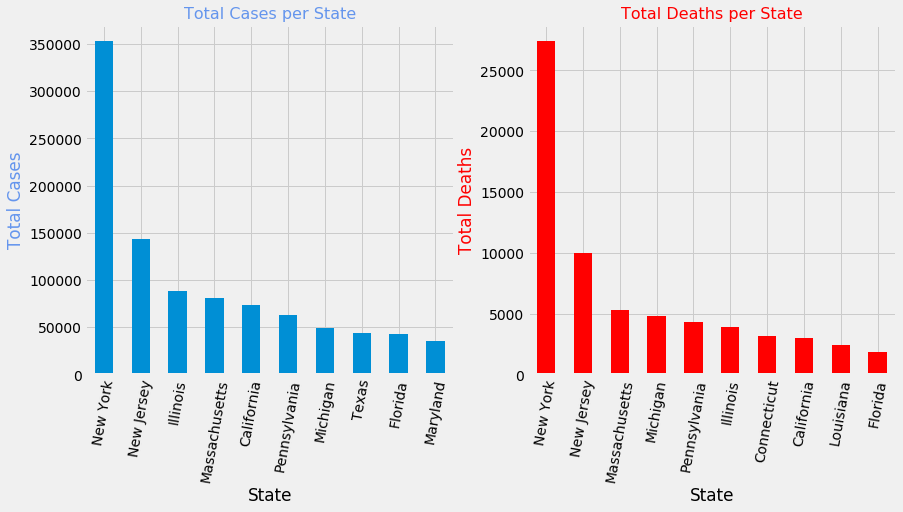

In [86]:
plt.figure(figsize= (20, 6))

# Total cases
plt.subplot(1,3, 1)
usa["total_cases"].head(10).plot.bar()
plt.xticks(rotation = 80)
plt.xlabel('State')
plt.ylabel('Total Cases', color = 'cornflowerblue')
plt.title('Total Cases per State', fontsize= 16, color = 'cornflowerblue')

# Total deaths
plt.subplot(1,3, 2)
usa.total_deaths.sort_values(ascending = False)[:10].plot.bar(color = 'r')
plt.xticks(rotation = 80)
plt.xlabel('State')
plt.ylabel('Total Deaths', color = 'r')
plt.title('Total Deaths per State', fontsize= 16, color = 'r');